### Descargar imágenes desde la nube

In [ ]:
import os
if os.path.exists('Imagenes'):   
    print ('La carpeta ya existe')
else:
    os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
    os.system('unzip Imagenes.zip?dl=1')
    os.system('rm -r Imagenes.zip?dl=1')
    print('ImAgenes descargadas')

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Leer imagen

In [3]:
ima = cv2.imread("C:/Users/SANTIAGO/PDI Procesamiento Digital de Imagenes/Unidad 3 - OpenCV/Datasets/1/Cromo.png")

ima=cv2.cvtColor(ima, cv2.COLOR_BGR2RGB)

(-0.5, 306.5, 278.5, -0.5)

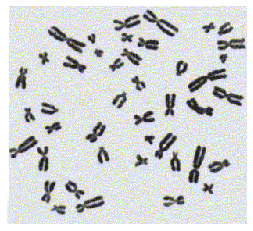

In [4]:
plt.imshow(ima)
plt.axis('off')

In [5]:
def graficas(im1,im2):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.imshow(im1)
    plt.axis('off')
    plt.title('Original')
    plt.subplot(1,2,2)
    plt.imshow(im2)   
    plt.axis('off')
    plt.title('Convolucion')

### Convolución
Se denomina convolución a una operación matemática que de forma lineal y continua, transforma dos funciones $f$ y $g$ en una tercera, donde esta última, representa la magnitud en la que se superponen f y una versión trasladada e invertida de g. La función de convolución se expresa por el símbolo $*$ y en un sistema unidimensional, se dice que $g(x)$ convoluciona f(x) cuando:
$$f(x)\ast g(x)=\int_{-\infty}^{\infty}f(\tau )g(x-\tau)d\tau$$
donde $\tau$ es una variable de integración.

Para el caso bidimensional, la convolución se ve de la siguiente forma:

$$(f\ast g)(x,y)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(\tau,\eta)g(x-\tau,y-\eta)d\tau d\eta$$

En imágenes la función $g(x,y)$ es conocido también como kernel y suele ser de un tamaño mucho menor que la función $f(x,y)$, es decir, la imagen.

#### Acontinuación 
Se crean varios kernels y se gráfican como imágenes.

Kernel promedio de 3x3
$$K=\dfrac{1}{9}\begin{bmatrix} 1 & 1 & 1  \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}_{3x3}$$

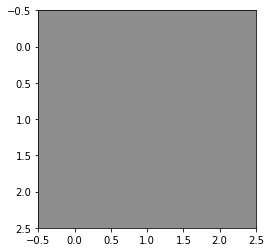

In [11]:
kernel=np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], dtype='float32')/9
plt.imshow(kernel, vmin=-1, vmax=1, cmap='gray')

Kernel promedio de 10x10
$$K=\dfrac{1}{100}\begin{bmatrix} 1 & ... & 1  \\ \vdots  & \ddots & \vdots  \\ 1 & ... & 1 \end{bmatrix}_{10x10}$$

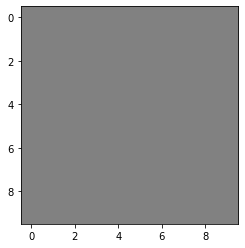

In [12]:
kernel1=np.ones((10,10), dtype='float32')/100
plt.imshow(kernel1, vmin=-1, vmax=1, cmap='gray')

Kernel gaussiano 3x3
$$K=\dfrac{1}{25}\begin{bmatrix} 1 & 3 & 1  \\ 3 & 9 & 3 \\ 1 & 3 & 1 \end{bmatrix}_{3x3}$$

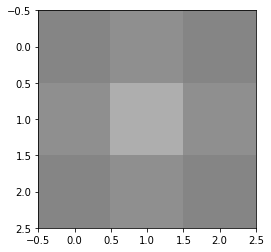

In [13]:
kernel2=np.array([[1, 3, 1], [3, 9, 3], [1, 3, 1]], dtype='float32')/25
plt.imshow(kernel2, vmin=-1, vmax=1, cmap='gray')

Kernel vertical
$$K=\begin{bmatrix} -1 & 0 & 1  \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}_{3x3}$$

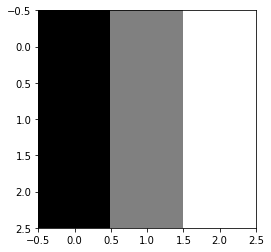

In [14]:
kernel3=np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype='float32')
plt.imshow(kernel3, vmin=-1, vmax=1, cmap='gray')

Kernel horizontal
$$K=\begin{bmatrix} 1 & 1 & 1  \\ 0 & 0 & 0 \\ -1 & -1 & -1 \end{bmatrix}_{3x3}$$

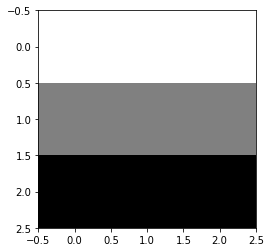

In [15]:
kernel4=np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype='float32')
plt.imshow(kernel4, vmin=-1, vmax=1, cmap='gray')

kernel diagonal
$$K=\begin{bmatrix} -2 & -1 & 0  \\ -1 & 0 & 1 \\ 0 & 1 & 2 \end{bmatrix}_{3x3}$$

In [ ]:
kernel5=np.array([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]], dtype='float32')
plt.imshow(kernel5, vmin=-2, vmax=2, cmap='gray')

Kernel aleatorio

In [ ]:
kernel6=np.random.rand(3,3)-0.5
kernel6=kernel6/np.sum(kernel6)
plt.imshow(kernel6, vmin=-1, vmax=1, cmap='gray')

In [ ]:
#Kernel promedio de 3x3, el segundo argumento debería ser el arreglo de salida
imaOut = cv2.filter2D(ima,-1, kernel)
graficas(ima, imaOut)

In [ ]:
#Kernel promedio de 10x10
imaOut = cv2.filter2D(ima,-1, kernel1)
graficas(ima, imaOut)

In [ ]:
#Kernel gaussiano de 3x3
imaOut = cv2.filter2D(ima,-1, kernel2)
graficas(ima, imaOut)

In [ ]:
#Kernel horizontal
imaOut = cv2.filter2D(ima,-1, kernel3)
graficas(ima, imaOut)

In [ ]:
#Kernel vertical
imaOut = cv2.filter2D(ima,-1, kernel4)
graficas(ima, imaOut)

In [ ]:
#Kernel diagonal
imaOut = cv2.filter2D(ima,-1, kernel5)
graficas(ima, imaOut)

In [ ]:
#Kernel aleatorio
imaOut = cv2.filter2D(ima,-1, kernel6)
graficas(ima, imaOut)